In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
os.chdir('c:\\Users\\ASUS\\Projects')
df = pd.read_csv('CI\\Asia_ImportQuantity.csv',encoding='latin-1')
df = df.set_index('Year')
df.head()

,Area,Item,Value
Year,,,
2011,Afghanistan,"Ammonia, anhydrous",4.49
2014,Afghanistan,"Ammonia, anhydrous",2.00
2017,Afghanistan,"Ammonia, anhydrous",2.07
2002,Afghanistan,Ammonium nitrate (AN),1786.13
2007,Afghanistan,Ammonium nitrate (AN),0.64


 Select Item 'Urea' and Quantity Value of Asian Countries in tonnes for Predictions.

In [7]:
#df['Item'].value_counts()
df = df[df['Item']=='Urea']
df = df.drop('Item',axis =1)

In [15]:
Asia_importQ_Urea = df.pivot_table(columns='Area',values='Value',index='Year')
Asia_importQ_Urea.head()

Area,Afghanistan,Armenia,Bahrain,Bangladesh,Bhutan,Brunei Darussalam,Cambodia,"China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of",...,Singapore,Sri Lanka,Syrian Arab Republic,Tajikistan,Thailand,Turkey,United Arab Emirates,Uzbekistan,Viet Nam,Yemen
Year,,,,,,,,,,,,,,,,,,,,,
2002,1151.80,13.20,452.70,281270.01,NaN,18.39,309.00,1114.03,1.20,309426.83,...,2902.53,322243.04,122933.00,19338.88,1513339.19,648210.55,4009.69,0.04,1603888.85,14031.92
2003,3002.40,28.02,3069.15,12385.03,NaN,164.14,NaN,1079.59,3.25,329946.91,...,15290.69,309638.24,79530.18,1724.80,1623095.37,696935.73,5681.18,0.68,1768332.46,8803.14
2004,NaN,3481.81,5588.01,303116.29,NaN,22.00,50.00,981.81,NaN,357590.38,...,18222.00,274998.92,229148.00,2000.00,1687654.17,942173.25,2288.84,0.25,1682610.88,34737.52
2005,222.35,3.20,4577.10,739783.07,4141.16,16532.00,NaN,525.56,1.99,251329.96,...,20582.40,301910.79,198805.00,NaN,1588362.28,808284.41,9204.65,NaN,983139.18,6746.60
2006,NaN,518.34,4466.06,1104629.03,2986.85,17.51,0.02,386.86,NaN,240148.26,...,22899.09,354376.31,62643.19,NaN,1514897.49,1104413.38,62399.00,NaN,728750.90,18545.29


Handling Missing Values

In [9]:
Asia_importQ_Urea.isnull().sum()


Area
Afghanistan                   5
Armenia                       0
Bahrain                       0
Bangladesh                    0
Bhutan                        8
Brunei Darussalam             0
Cambodia                      3
China, Hong Kong SAR          0
China, Macao SAR              9
China, Taiwan Province of     0
China, mainland               0
India                         0
Indonesia                     0
Iran (Islamic Republic of)    0
Iraq                          4
Israel                        0
Japan                         0
Jordan                        0
Kazakhstan                    0
Kuwait                        6
Kyrgyzstan                    1
Lebanon                       1
Malaysia                      0
Maldives                      0
Mongolia                      0
Myanmar                       0
Nepal                         6
Oman                          0
Pakistan                      1
Philippines                   0
Qatar                         3
Rep

In [10]:
removed_countries = []
for (columnName,columnData ) in Asia_importQ_Urea.iteritems():
    if (columnData.isnull().sum()) >= 3:
        removed_countries.append(columnName)

In [11]:
removed_countries

['Afghanistan',
 'Bhutan',
 'Cambodia',
 'China, Macao SAR',
 'Iraq',
 'Kuwait',
 'Nepal',
 'Qatar',
 'Saudi Arabia']

Handling two countries with most missing values.

In [16]:
Asia_importQ_Urea = Asia_importQ_Urea.drop(removed_countries,axis=1)

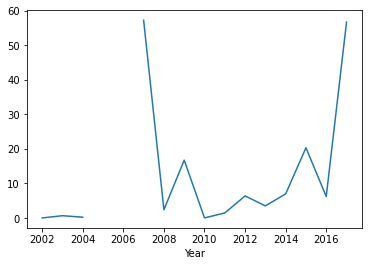

In [13]:
Asia_importQ_Urea['Uzbekistan'].plot()


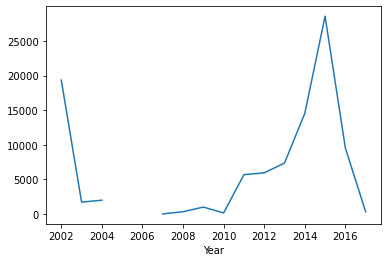

In [14]:
Asia_importQ_Urea['Tajikistan'].plot()

In [17]:
Asia_importQ_Urea['Tajikistan'].fillna(0,inplace=True)
for (columnName,columnData ) in Asia_importQ_Urea.iteritems():
    Asia_importQ_Urea[columnName].fillna(columnData.mean(),inplace=True)

In [18]:
Asia_importQ_Urea.to_csv('Processed_data.csv')